## Statsmodel Auto-regressive time series model demo
https://www.statsmodels.org/stable/examples/notebooks/generated/autoregressions.html

An autoregressive model is given by
$$y_t = \delta + \sum_{i=1}^p a_i x_{t-i} + \epsilon_t$$
where $\delta$ is a constant term, $\epsilon_t$ is a zero-mean, white noise. $p$ is the model order, and $\{x_t\}$ is a time series. For an auto-regressive model, the model output $y_t = x_{t'}$ is a future $(t' > t)$ value of $x_t$. When using this model for one-step prediction $(t' = t+1)$, one has
$$\hat{x}_{t+1} = \hat{\delta} + \sum_{i=1}^p \hat{a}_i x_{t-i}$$
where $\hat{\delta}$ and $\{\hat{a}_i; 1 \le i \le p\}$ are estimated AR parameters, and $\{x_{t-i}; 1 \le i \le p\}$ are past $p$ observations.

In [1]:
# This first cell imports standard packages and sets plots to appear inline.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [2]:
# This cell sets the plotting style, registers pandas date converters for matplotlib, and sets the default figure size.
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

In this examples, the dataset is the month-over-month growth rate in U.S. Housing starts that has not been seasonally adjusted. The seasonality is evident by the regular pattern of peaks and troughs. We set the frequency for the time series to “MS” (month-start) to avoid warnings when using AutoReg.

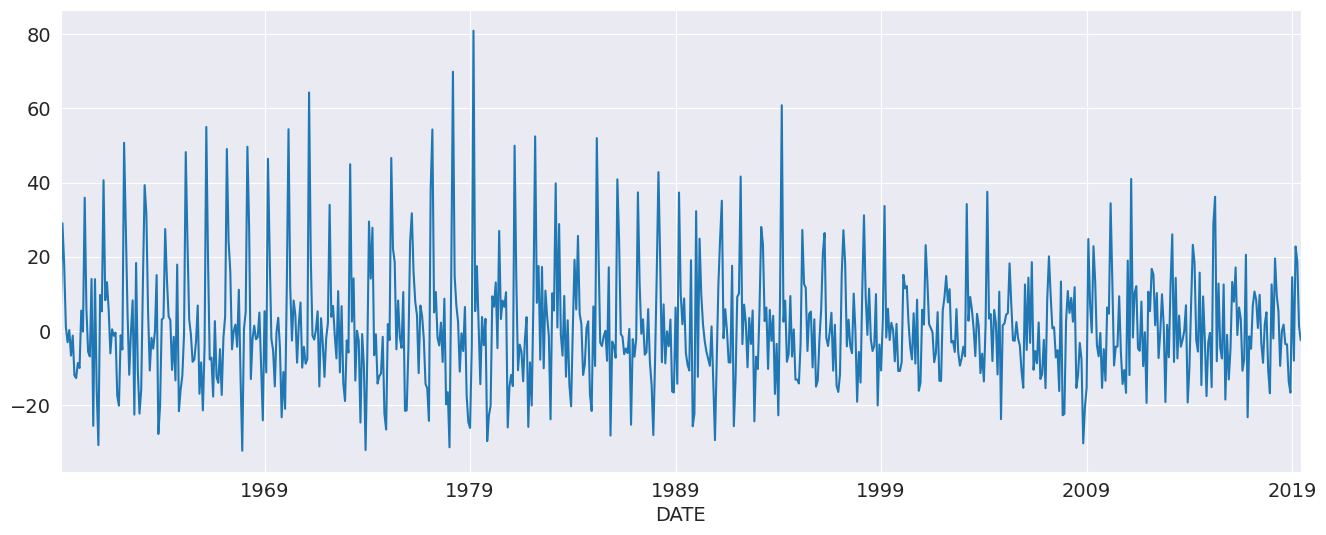

In [3]:
data = pdr.get_data_fred("HOUSTNSA", "1959-01-01", "2019-06-01")
housing = data.HOUSTNSA.pct_change().dropna()
# Scale by 100 to get percentages
housing = 100 * housing.asfreq("MS")
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)

In [4]:
# We can start with an AR(3). While this is not a good model for this data, it
# demonstrates the basic use of the API.
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.ar_model.AutoReg.html
mod = AutoReg(housing, 3)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Sat, 06 Apr 2024   AIC                           5996.884
Time:                        22:44:05   BIC                           6019.794
Sample:                    05-01-1959   HQIC                          6005.727
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1228      0.573      1.961      0.050       0.000       2.245
HOUSTNSA.L1     0.1910      0.036      5.235      0.000       0.120       0.263
HOUSTNSA.L2     0.0058      0.037      0.155    

AutoReg supports the same covariance estimators as OLS. Below, we use cov_type="HC0", which is White’s covariance estimator. While the parameter estimates are the same, all of the quantities that depend on the standard error change.

In [5]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Sat, 06 Apr 2024   AIC                           5996.884
Time:                        22:44:05   BIC                           6019.794
Sample:                    05-01-1959   HQIC                          6005.727
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1228      0.601      1.869      0.062      -0.055       2.300
HOUSTNSA.L1     0.1910      0.035      5.499      0.000       0.123       0.259
HOUSTNSA.L2     0.0058      0.039      0.150    

In [6]:
sel = ar_select_order(housing, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                    AutoReg(13)   Log Likelihood               -2676.157
Method:               Conditional MLE   S.D. of innovations             10.378
Date:                Sat, 06 Apr 2024   AIC                           5382.314
Time:                        22:44:05   BIC                           5450.835
Sample:                    03-01-1960   HQIC                          5408.781
                         - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3615      0.458      2.970      0.003       0.463       2.260
HOUSTNSA.L1     -0.2900      0.036     -8.161      0.000      -0.360      -0.220
HOUSTNSA.L2     -0.0828      0.031     -2.65

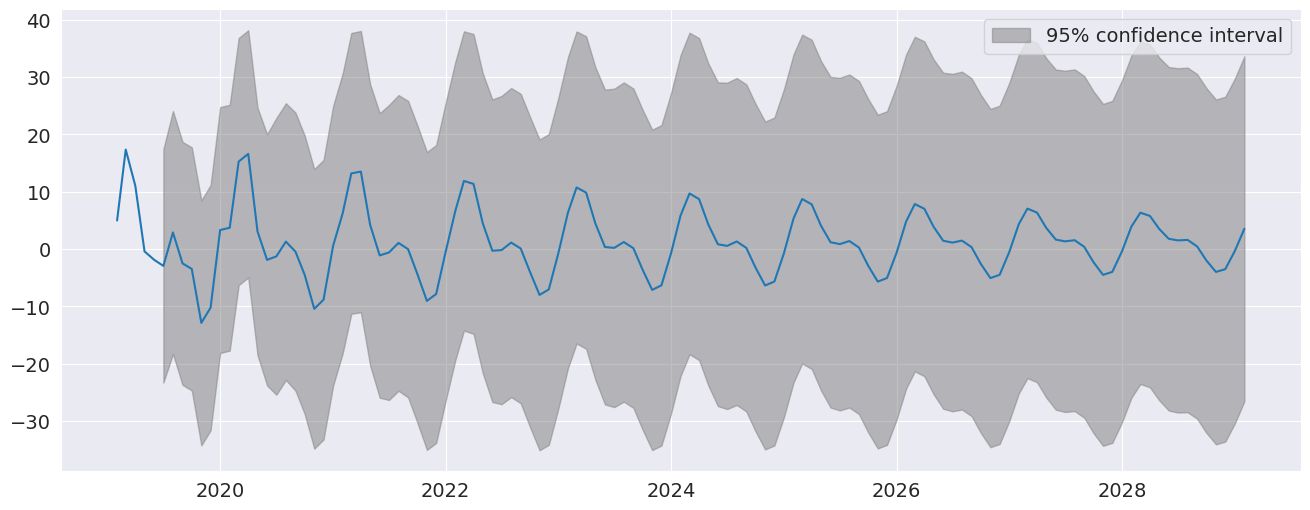

In [7]:
# plot_predict visualizes forecasts. Here we produce a large number of forecasts
# which show the string seasonality captured by the model.
fig = res.plot_predict(720, 840)

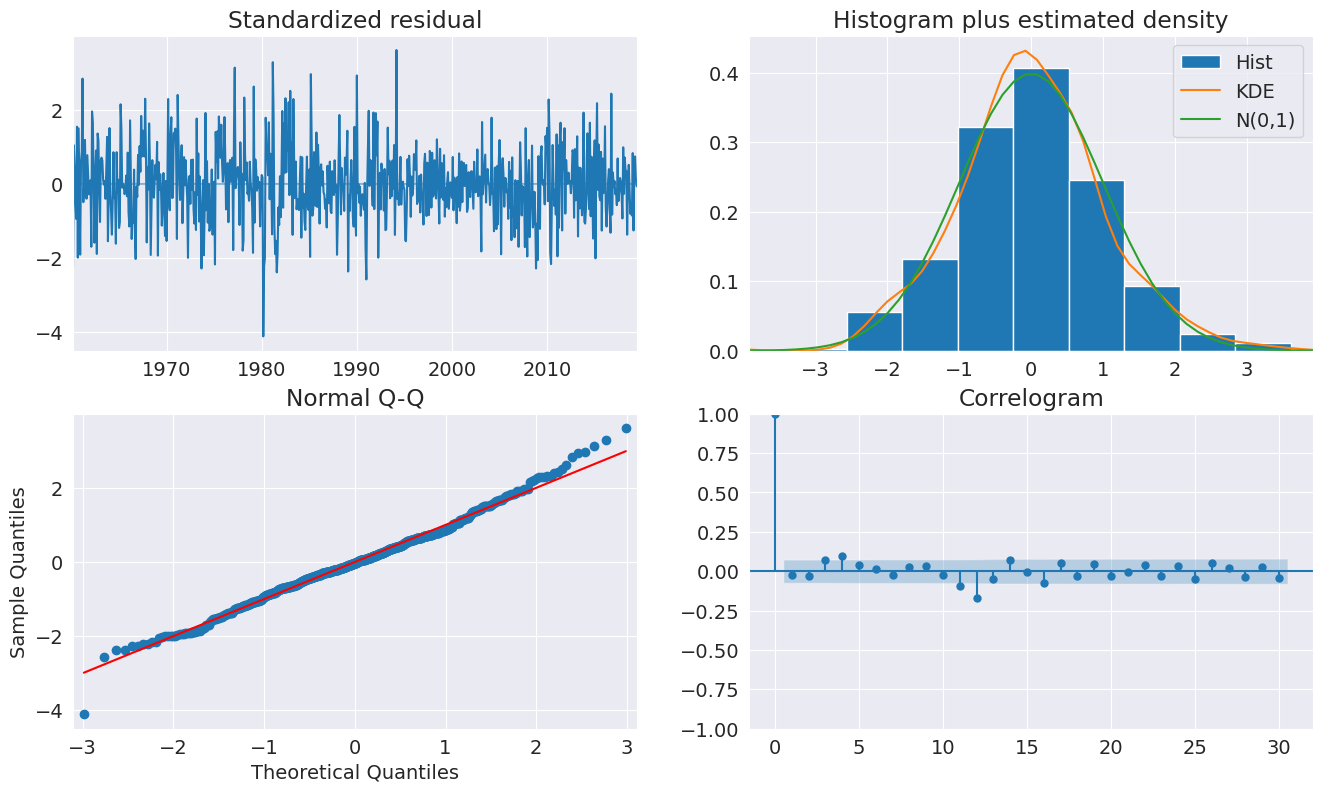

In [8]:
# plot_diagnositcs indicates that the model captures the key features in the data.
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)